## Step 01: 

KNN Regressor & Linear Regression:
1. Import data set
2. Seperate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate Model (Accuracy, MSE, MAE)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Data set
df=pd.read_csv('./DataSet/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.tail()

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()

<AxesSubplot:>

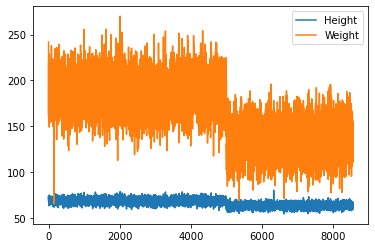

In [8]:
df.plot()

<AxesSubplot:xlabel='Height', ylabel='Weight'>

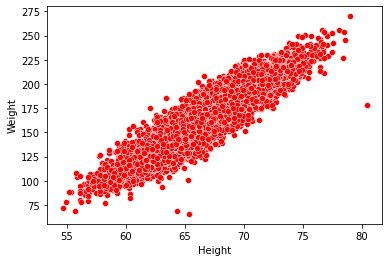

In [9]:
sns.scatterplot(df.Height,df.Weight,color='red')

<AxesSubplot:xlabel='Gender', ylabel='count'>

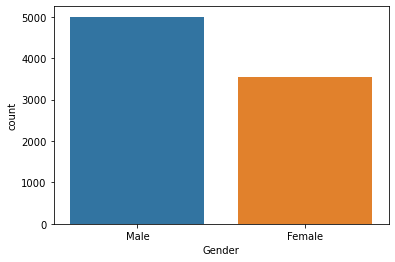

In [10]:
sns.countplot(df['Gender'],data=df)

### Label encoding gender feature:

In [11]:
from pandas.core.dtypes.common import is_numeric_dtype

In [12]:
from sklearn.preprocessing import LabelEncoder # importing Label Encoder modules
lben = LabelEncoder() # Create object for Label Encoder 
df1['Gender'] = lben.fit_transform(df1['Gender'])

In [13]:
df1

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [14]:
df1.shape

(8555, 3)

<AxesSubplot:xlabel='Gender', ylabel='count'>

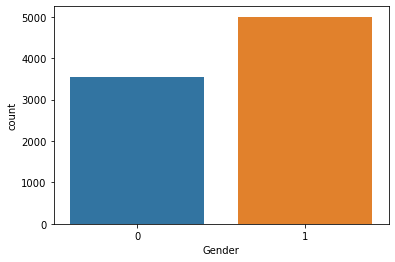

In [15]:
sns.countplot(df1['Gender'], data = df1)

Text(0.5, 1.0, 'Height vs Gender')

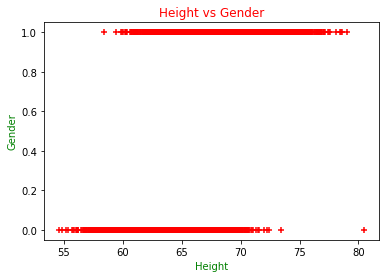

In [16]:
plt.scatter(df1.Height,df1['Gender'],color='red',marker='+')
plt.xlabel('Height',color='green')
plt.ylabel('Gender',color='green')
plt.title('Height vs Gender',color='red')

Text(0.5, 1.0, 'Weight vs Gender')

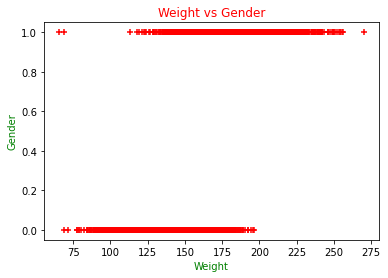

In [17]:
plt.scatter(df1.Weight,df1['Gender'],color='red',marker='+')
plt.xlabel('Weight',color='green')
plt.ylabel('Gender',color='green')
plt.title('Weight vs Gender',color='red')

### Standardize Height feature:

In [18]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
col = ['Height']
df1[col] = std.fit_transform(df1[col])
df1.head()

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801


### Split data for train and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df1.drop(['Weight'], axis=1)
Y = df1['Weight']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [21]:
print("--------------x_train----------------")
print(x_train.head())
print("--------------x_test----------------")
print(x_test.head())
print("--------------x_train----------------")
print(y_train.head())
print("--------------y_test----------------")
print(y_test.head())

--------------x_train----------------
      Gender    Height
1277       1  1.447687
5361       0 -1.518938
5728       0  0.599644
4276       1  0.379392
3112       1 -0.472192
--------------x_test----------------
      Gender    Height
7154       0 -0.452294
3258       1  1.042451
2188       1  0.481319
5609       0 -0.213520
3186       1  1.062397
--------------x_train----------------
1277    189.165592
5361    124.876796
5728    168.864403
4276    172.941248
3112    144.551044
Name: Weight, dtype: float64
--------------y_test----------------
7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
Name: Weight, dtype: float64


### Apply linear regression:

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [23]:
np.array(y_test)

array([160.8007256, 184.5166876, 184.2627962, ..., 153.4364809,
       170.3101222, 195.3926176])

In [24]:
reg.predict([[1.827233,1]])

array([212.55999762])

In [25]:
reg.score(x_test,y_test)*100

90.59959607091162

In [26]:
reg.score(x_train,y_train)*100

89.72135459668117

### Evaluate linear regression performance:

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
print("MSE = ", mean_squared_error(y_test,y_pred)) # The mean squared error
print("MAE =", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy: ", reg.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", reg.score(x_test, y_test)*100) # Check testing accuracy

MSE =  99.6725099807003
MAE = 7.982132592729127
Traning Accuracy:  89.72135459668117
Testing Accuracy:  90.59959607091162


# First Logic

### Finding an appropiate n_neighbors value for kNN regressor by uniform and distance weight function:

In [29]:
df2=df1.copy()

In [30]:
X = df2.drop(['Weight'], axis=1)
Y = df2['Weight']

In [31]:
X.head()

,Gender,Height
0,1,1.827233
1,1,0.512039
2,1,1.895545
3,1,1.277788
4,1,0.797634


In [32]:
Y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.30,random_state=2)

from sklearn.neighbors import KNeighborsRegressor
neigh_regression = KNeighborsRegressor(n_neighbors=93)

neigh_regression.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=93)

In [34]:
neigh_regression.predict([[1.827233, 1]])

array([197.22393379])

In [35]:
y_pred=  neigh_regression.predict(x_test)
y_pred

array([152.48662108, 159.65050522, 192.46943875, ..., 222.77222726,
       169.9447301 , 186.66826581])

In [36]:
np.array(y_test)

array([135.6308771, 138.0926359, 190.3244396, ..., 219.1132095,
       156.6766747, 178.6855465])

### Evaluate kNN regression performance:

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MSE = ", mean_squared_error(y_test,y_pred)) # The mean squared error
print("MAE =", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy: ", neigh_regression.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", neigh_regression.score(x_test, y_test)*100) # Check testing accuracy

MSE =  101.210694697865
MAE = 7.961071091994714
Traning Accuracy:  89.8058694147931
Testing Accuracy:  90.13819325942775


# Second Logic

### Finding an appropiate n_neighbors value for kNN regressor by uniform and distance weight function:

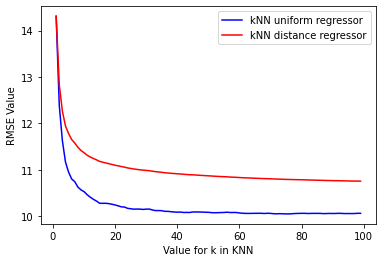

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
knu = []
knd = []
kr = range(1, 100)
for i in kr:
    knru = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    knru.fit(x_train, y_train)
    pred_knru = knru.predict(x_test)
    knu.append(sqrt(mean_squared_error(y_test, pred_knru)))
    
    knrd = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knrd.fit(x_train, y_train)
    pred_knrd = knrd.predict(x_test)
    knd.append(sqrt(mean_squared_error(y_test, pred_knrd)))

plt.plot(kr, knu, color='blue', label='kNN uniform regressor')
plt.plot(kr, knd, color='red', label='kNN distance regressor')
plt.xlabel('Value for k in KNN')
plt.ylabel('RMSE Value')
plt.legend(loc='best')
plt.show()

In [39]:
# Apply optimised n_neighbors value for kNN regressor with uniform weight function:
knu40 = KNeighborsRegressor(n_neighbors = 40, weights='uniform')
knu40.fit(x_train, y_train)
y_pred40 = knu40.predict(x_test)

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred40)) # The mean squared error
print("MAE for KNN uniform=", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy for kNN uniform: ", knu40.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", knu40.score(x_test, y_test)*100) # Check testing accuracy

MSE for kNN uniform:  101.74250047197445
MAE for KNN uniform= 7.961071091994714
Traning Accuracy for kNN uniform:  90.03469879163552
Testing Accuracy kNN uniform:  90.08637496311584


In [40]:
# Apply optimised n_neighbors value for kNN regressor with distance weight function:
knd30 = KNeighborsRegressor(n_neighbors = 30, weights='distance')
knd30.fit(x_train, y_train)
y_pred30 = knd30.predict(x_test)

print("MSE for kNN distance: ", mean_squared_error(y_test, y_pred30)) # The mean squared error
print("MAE for KNN distance: ", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy for kNN distance: ", knd30.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy kNN distance: ", knd30.score(x_test, y_test)*100) # Check testing accuracy

MSE for kNN distance:  120.71361865833076
MAE for KNN distance:  7.961071091994714
Traning Accuracy for kNN distance:  100.0
Testing Accuracy kNN distance:  88.23785982580844


## Split dataset for kNN Classification

In [41]:
df2

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801
...,...,...,...
8550,0,-1.642587,110.565497
8551,0,-0.879344,129.921671
8552,0,-0.318306,155.942671
8553,0,0.161000,151.678405


In [42]:
df3=df2
df3

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801
...,...,...,...
8550,0,-1.642587,110.565497
8551,0,-0.879344,129.921671
8552,0,-0.318306,155.942671
8553,0,0.161000,151.678405


In [43]:
feature_data = df3.drop(['Gender'], axis=1)
target_data = df3['Gender']

x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=1)

In [44]:
print("--------------x_train----------------")
print(x_train.head())
print("--------------x_test----------------")
print(x_test.head())
print("--------------x_train----------------")
print(y_train.head())
print("--------------y_test----------------")
print(y_test.head())

--------------x_train----------------
        Height      Weight
1277  1.447687  189.165592
5361 -1.518938  124.876796
5728  0.599644  168.864403
4276  0.379392  172.941248
3112 -0.472192  144.551044
--------------x_test----------------
        Height      Weight
7154 -0.452294  160.800726
3258  1.042451  184.516688
2188  0.481319  184.262796
5609 -0.213520  166.844114
3186  1.062397  200.466282
--------------x_train----------------
1277    1
5361    0
5728    0
4276    1
3112    1
Name: Gender, dtype: int32
--------------y_test----------------
7154    0
3258    1
2188    1
5609    0
3186    1
Name: Gender, dtype: int32


Step 02:
KNN Classifier:
1. Import data set
2. Seperate x and y (y=diagnosis)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Fist Logic

### KNN Classifier

### Finding an appropiate n_neighbors value for kNN classifier by uniform and distance weight function:

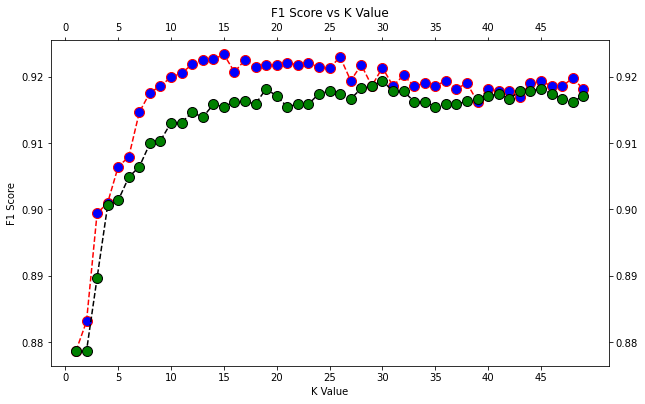

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
f1s = []
f2s = []
for i in range(1, 50):
    knct = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knct.fit(x_train, y_train)
    pred_i = knct.predict(x_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))
    
    knct2 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knct2.fit(x_train, y_train)
    pred_i2 = knct2.predict(x_test)
    f2s.append(f1_score(y_test, pred_i2, average='weighted'))
           
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 50), f2s, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('F1 Score vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.xticks(range(0, 50, 5))
plt.tick_params(labeltop=True, labelright=True, top=True, right=True)

### Apply optimised n_neighbors value for kNN classification with uniform weight function:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1055
           1       0.94      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567

MSE for kNN uniform:  0.07752239968835216
MAE for KNN uniform:  165.01625338899572
Traning Accuracy for kNN uniform:  0.9161656646626587
Testing Accuracy kNN uniform:  0.9224776003116478


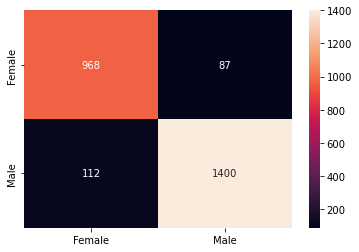

In [46]:
knc14 = KNeighborsClassifier(n_neighbors=14, weights='uniform')
knc14.fit(x_train, y_train)
y_pred_knc14 = knc14.predict(x_test)

# Model Evaluation:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

class_name = ['Female', 'Male']
cm14 = pd.DataFrame(confusion_matrix(y_test, y_pred_knc14), columns=class_name, index=class_name)
sns.heatmap(cm14, annot=True, fmt='d')
print(classification_report(y_test, y_pred_knc14))

print("MSE for kNN uniform: ", mean_squared_error(y_test, y_pred_knc14)) # The mean squared error
print("MAE for KNN uniform: ", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy for kNN uniform: ", knc14.score(x_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN uniform: ", knc14.score(x_test, y_test)) # Check testing accuracy

### Apply optimised n_neighbors value for kNN classification with distance weight function:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1055
           1       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

MSE for kNN distance:  0.08531359563693026
MAE for KNN distance:  165.01625338899572
Traning Accuracy for kNN distance:  1.0
Testing Accuracy kNN distance:  0.9146864043630697


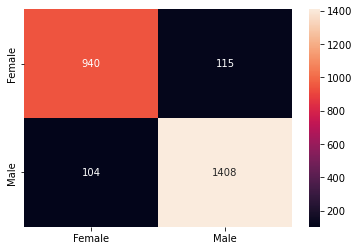

In [47]:
knc12 = KNeighborsClassifier(n_neighbors=12, weights='distance')
knc12.fit(x_train, y_train)
y_pred_knc12 = knc12.predict(x_test)

# Model Evaluation:
class_name = ['Female', 'Male']
cm12 = pd.DataFrame(confusion_matrix(y_test, y_pred_knc12), columns=class_name, index=class_name)
sns.heatmap(cm12, annot=True, fmt='d')
print(classification_report(y_test, y_pred_knc12))

print("MSE for kNN distance: ", mean_squared_error(y_test, y_pred_knc12)) # The mean squared error
print("MAE for KNN distance: ", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy for kNN distance: ", knc12.score(x_train, y_train)) # Check training accuracy
print ("Testing Accuracy kNN distance: ", knc12.score(x_test, y_test)) # Check testing accuracy

### ROC and AUC evaluation

0.9217307354748114 0.9111060959402192


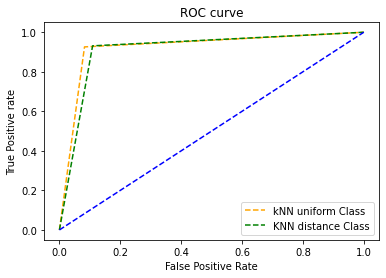

In [48]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_knc14, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_knc12, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, y_pred_knc14)
auc_score2 = roc_auc_score(y_test, y_pred_knc12)

print(auc_score1, auc_score2)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='kNN uniform Class')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN distance Class')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Second Logic

In [49]:
df4=df2
df4

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801
...,...,...,...
8550,0,-1.642587,110.565497
8551,0,-0.879344,129.921671
8552,0,-0.318306,155.942671
8553,0,0.161000,151.678405


In [50]:
x = df1.drop('Gender', axis = 1)
y = df1['Gender']

In [51]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=2)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=93)

neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=93)

In [52]:
if neigh.predict([[73.847017,241.893563]]) == 1:
    print("Male")
else:
    print("Female")

Male


In [53]:
if neigh.predict([[65.968019,156.802083]]) == 1:
    print("Male")
else:
    print("Female") 

Female


In [54]:
y_prediction =  neigh.predict(xtest)
y_prediction

array([0, 0, 1, ..., 1, 0, 1])

### Classification Report

In [55]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(ytest, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1058
           1       0.93      0.91      0.92      1509

    accuracy                           0.91      2567
   macro avg       0.90      0.91      0.90      2567
weighted avg       0.91      0.91      0.91      2567



In [56]:
cm = confusion_matrix(ytest, y_prediction)
cm

array([[ 951,  107],
       [ 131, 1378]], dtype=int64)

In [57]:
neigh.score(xtest, ytest)*100

90.72847682119205

In [58]:
from sklearn import metrics
metrics.accuracy_score(ytest, y_prediction) * 100

90.72847682119205

<AxesSubplot:>

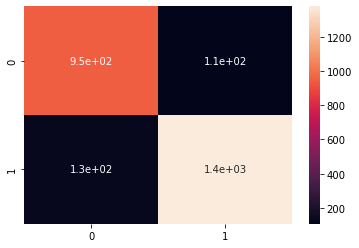

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot = True)

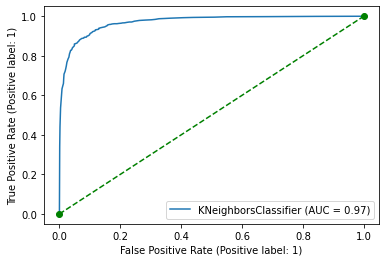

In [60]:
plot_roc_curve(neigh, xtest, ytest)
plt.plot([0,1],[0,1], 'go--')

In [61]:
import sklearn.metrics
import math

def matrix_metrix(ytest,y_prediction):
   CM = confusion_matrix(ytest,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)


mat_met = matrix_metrix(ytest,y_prediction)
print (mat_met)

        Metric      Value
0           TP   951.0000
1           TN  1378.0000
2           FP   131.0000
3           FN   107.0000
4   Population  2567.0000
5   Prevalence     0.4200
6     Accuracy     0.9073
7    Precision     0.8789
8          NPV     0.9279
9          FDR     0.1211
10         TPR     0.8989
11      Recall     0.8989
12         FPR     0.0868
13         FNR     0.1011
14         TNR     0.9132
15         CSI     0.7998
16  F1_measure     0.8889
17          F1     0.8888
18          BA     0.9060


## Decision Tree

In [62]:
df5=df2
df5

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801
...,...,...,...
8550,0,-1.642587,110.565497
8551,0,-0.879344,129.921671
8552,0,-0.318306,155.942671
8553,0,0.161000,151.678405


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=1)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_prediction = clf.predict(x_test)
y_prediction

array([1, 1, 1, ..., 0, 1, 1])

In [65]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1055
           1       0.89      0.91      0.90      1512

    accuracy                           0.88      2567
   macro avg       0.88      0.87      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [66]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[ 884,  171],
       [ 135, 1377]], dtype=int64)

In [67]:
clf.score(x_test, y_test)*100

88.0794701986755

In [68]:
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy * 100)

88.0794701986755


<AxesSubplot:>

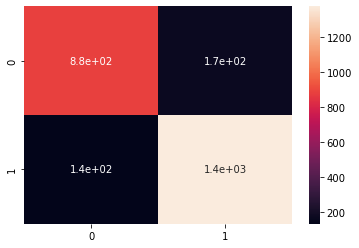

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(cm , annot = True)

# ROC CURVE

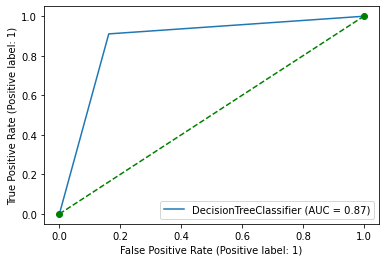

In [70]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1], 'go--')

In [71]:
import sklearn.metrics
import math

def matrix_metrix(y_test,y_prediction):
   CM = confusion_matrix(y_test,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)

mat_met = matrix_metrix(y_test,y_prediction)
print (mat_met)

        Metric      Value
0           TP   884.0000
1           TN  1377.0000
2           FP   135.0000
3           FN   171.0000
4   Population  2567.0000
5   Prevalence     0.4000
6     Accuracy     0.8808
7    Precision     0.8675
8          NPV     0.8895
9          FDR     0.1325
10         TPR     0.8379
11      Recall     0.8379
12         FPR     0.0893
13         FNR     0.1621
14         TNR     0.9107
15         CSI     0.7429
16  F1_measure     0.8527
17          F1     0.8524
18          BA     0.8743
